In [49]:
import sys
print(sys.executable)

c:\users\teedaniels\appdata\local\programs\python\python38-32\python.exe


In [106]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
stopwords = set(STOPWORDS)
from collections import Counter

In [51]:
Train = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Train_Data.csv')
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6726 non-null   int64 
 1   tweet   6726 non-null   object
 2   label   6726 non-null   object
dtypes: int64(1), object(2)
memory usage: 105.2+ KB


In [52]:
Train.head(100)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
95,96,COVID-19 update: There are no new cases of COV...,real
96,97,Compare the number of completed tests reported...,real
97,98,All 12 cases in the community are Auckland bas...,real
98,99,A precautionary message that one can catch fir...,fake


In [53]:
Valid = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Validation_Data.csv')
Valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2227 non-null   int64 
 1   tweet   2227 non-null   object
 2   label   2227 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.9+ KB


In [54]:
Valid.head(10)

,id,tweet,label
0,1,Carrefour is offering a R$ 300 voucher for fam...,fake
1,2,#IndiaFightsCorona @WHO has advised 140 tests ...,real
2,3,The states reported more than 26000 newly disc...,real
3,4,A Facebook user uploaded a video showing a man...,fake
4,5,Prime Minister Boris Johnson faces Labour depu...,real
5,6,Trump Virus Infects Entire White House https:/...,fake
6,7,A video from family doctor Natalia Prego Cance...,fake
7,8,PM @ScottMorrisonMP recently said a #COVID19 v...,fake
8,9,RT @CDCDirector: Your risk of #COVID19 increas...,real
9,10,📢#CoronaVirusUpdates: ✅India's #COVID19 recove...,real


In [55]:
Test = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Test_Data.csv')
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2227 non-null   int64 
 1   tweet   2227 non-null   object
 2   label   2227 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.9+ KB


In [56]:
Test.head(10)

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real
5,6,Low #vitaminD was an independent predictor of ...,real
6,7,A common question: why are the cumulative outc...,real
7,8,The government should consider bringing in any...,real
8,9,Our daily update is published. We’ve now track...,real
9,10,Breakdown of testing: 4 air crew 97 hotel &amp...,real


In [57]:
Entire = pd.concat([Train, Valid, Test])
Entire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11180 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11180 non-null  int64 
 1   tweet   11180 non-null  object
 2   label   11180 non-null  object
dtypes: int64(1), object(2)
memory usage: 262.0+ KB


In [149]:
print(Train['label'].value_counts())
print(Valid['label'].value_counts())
print(Test['label'].value_counts())
print(Entire['label'].value_counts())

real    3522
fake    3204
Name: label, dtype: int64
real    1161
fake    1066
Name: label, dtype: int64
real    1171
fake    1056
Name: label, dtype: int64
real    5854
fake    5326
Name: label, dtype: int64


In [11]:
Combined_Tweets = Entire['tweet']
Fake_Tweets = Entire[Entire['label']=='fake']['tweet']
Real_Tweets = Entire[Entire['label']=='real']['tweet']

In [12]:
Real_Tweets

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
5       Covid Act Now found "on average each person in...
                              ...                        
2215    A sample of COVID-19 patients reported typical...
2217    Sir Keir Starmer is out of isolation after his...
2224    #COVID19 limits access to the vital support ne...
2225    Our daily update is published. We’ve now track...
2226    If Alabama continues to #StayAtHome hospitals ...
Name: tweet, Length: 5854, dtype: object

In [144]:
word_counter = 0
real_counter = 0
fake_counter = 0

for sentence in Entire['tweet'] :
    for word in sentence :
        word_counter += 1
print('Combined Words =', word_counter)

for sentence in Entire[Entire['label']=='real']['tweet'] :
    for word in sentence :
        real_counter += 1
print('Real Words =', real_counter)

for sentence in Entire[Entire['label']=='fake']['tweet'] :
    for word in sentence :
        fake_counter += 1
print('Fake Words =', fake_counter)

Combined Words = 2035208
Real Words = 1262973
Fake Words = 772235


In [139]:
print(sum(len(x) for x in Combined_Tweets))
print(sum(len(x) for x in Combined_Tweets) / len(Combined_Tweets))
print(sum(len(x) for x in Real_Tweets) / len(Real_Tweets))
print(sum(len(x) for x in Fake_Tweets) / len(Fake_Tweets))

2035208
182.04007155635063
215.74530235736248
144.9934284641382


In [101]:
print(sum(len(x.split()) for x in Combined_Tweets) / len(Combined_Tweets))
print(sum(len(x.split()) for x in Real_Tweets) / len(Real_Tweets))
print(sum(len(x.split()) for x in Fake_Tweets) / len(Fake_Tweets))

27.186940966010734
31.877007174581482
22.031918888471647


In [15]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [16]:
Combined_Tokens = concat_all_sentences(Combined_Tweets)
Fake_Tokens = concat_all_sentences(Fake_Tweets)   
Real_Tokens = concat_all_sentences(Real_Tweets)

In [17]:
Combined_Tweets

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
2222    Trump Grabbed Coronavirus By The pussy https:/...
2223    A Facebook post names several claims about the...
2224    #COVID19 limits access to the vital support ne...
2225    Our daily update is published. We’ve now track...
2226    If Alabama continues to #StayAtHome hospitals ...
Name: tweet, Length: 11180, dtype: object

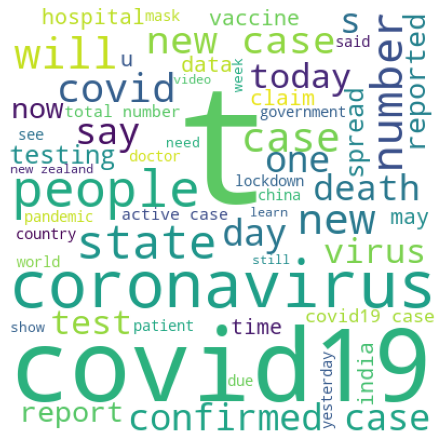

In [18]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(Combined_Tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

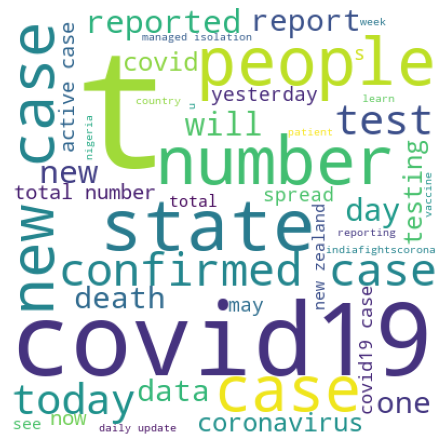

In [32]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(Real_Tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

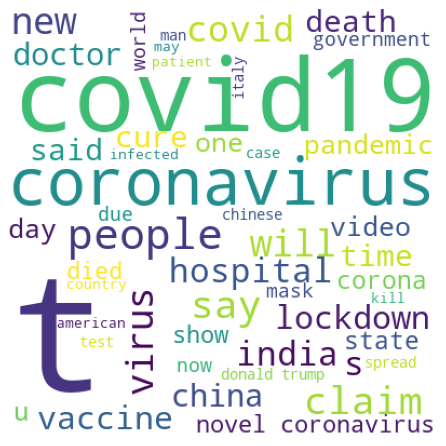

In [33]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(Fake_Tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [145]:
print(len(set(Combined_Tokens.split())))
print(len(set(Real_Tokens.split())))
print(len(set(Fake_Tokens.split())))
print(len(set(Fake_Tokens.split()).intersection(set(Real_Tokens.split()))))

38769
23810
20561
5602


In [21]:
Combined_Tokens_Words = [w for w in Combined_Tokens.split() if w not in stopwords]
Fake_Tokens_Words = [w for w in Fake_Tokens.split() if w not in stopwords]
Real_Tokens_Words = [w for w in Real_Tokens.split() if w not in stopwords]

In [22]:
Counter(Combined_Tokens_Words).most_common(20)

[('covid19', 4409),
 ('cases', 2495),
 ('coronavirus', 2115),
 ('new', 1807),
 ('people', 1222),
 ('tests', 1025),
 ('number', 867),
 ('will', 863),
 ('covid', 825),
 ('deaths', 817),
 ('total', 809),
 ('reported', 784),
 ('confirmed', 783),
 ('states', 758),
 ('testing', 710),
 ('covid19.', 683),
 ('health', 683),
 ('now', 623),
 ('india', 557),
 ('one', 556)]

In [23]:
Counter(Real_Tokens_Words).most_common(20)

[('covid19', 2818),
 ('cases', 2269),
 ('new', 1455),
 ('tests', 941),
 ('number', 795),
 ('total', 779),
 ('people', 749),
 ('reported', 723),
 ('confirmed', 713),
 ('deaths', 675),
 ('states', 670),
 ('testing', 621),
 ('now', 497),
 ('covid', 485),
 ('health', 470),
 ('will', 454),
 ('rt', 437),
 ('coronavirus', 435),
 ('report', 422),
 ('state', 397)]

In [24]:
Counter(Fake_Tokens_Words).most_common(20)

[('coronavirus', 1680),
 ('covid19', 1591),
 ('people', 473),
 ('will', 409),
 ('new', 352),
 ('covid', 340),
 ('trump', 339),
 ('coronavirus.', 336),
 ('says', 328),
 ('covid19.', 310),
 ('vaccine', 308),
 ('video', 306),
 ('virus', 284),
 ('president', 247),
 ('pandemic', 233),
 ('cases', 226),
 ('india', 220),
 ('shows', 219),
 ('hospital', 218),
 ('health', 213)]

In [27]:
Entire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11180 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11180 non-null  int64 
 1   tweet   11180 non-null  object
 2   label   11180 non-null  object
dtypes: int64(1), object(2)
memory usage: 262.0+ KB


In [40]:
#fig = px.line(Entire, x = Entire['label']=='Real', y = Entire['label']=='Fake', title = 'COVID-19 Tweets')
#fig.show()

In [102]:
Entire.to_csv(r'C:/Users/teedaniels/Desktop/Datasets/FNDS_Curated_Data.csv', index = None, header=True)